In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
tf.__version__

'1.14.0'

#### Data preprocessing
###### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('training_set',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 2461 images belonging to 2 classes.


Preprocessing the test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
validation_set = test_datagen.flow_from_directory('test_set',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 446 images belonging to 2 classes.


Building the CNN

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
# adding first convolutional layer
# input_shape : target_size + dimension of the picture. in-case of black and white it would be 1.
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
# Adding the second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
# Flattening
cnn.add(tf.keras.layers.Flatten())

In [12]:
# Full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
# Output Layers
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

Training the CNN

In [1]:
224*224*3

150528

In [15]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = validation_set, epochs = 30)

Epoch 1/30
77/77 [==============================] - 205s 3s/step - loss: 0.4772 - acc: 0.8025 - val_loss: 0.6754 - val_acc: 0.7197
Epoch 2/30
77/77 [==============================] - 159s 2s/step - loss: 0.2440 - acc: 0.9013 - val_loss: 0.1947 - val_acc: 0.9327
Epoch 3/30
77/77 [==============================] - 165s 2s/step - loss: 0.2052 - acc: 0.9204 - val_loss: 0.4275 - val_acc: 0.8251
Epoch 4/30
77/77 [==============================] - 162s 2s/step - loss: 0.2075 - acc: 0.9244 - val_loss: 0.3108 - val_acc: 0.8655
Epoch 5/30
77/77 [==============================] - 166s 2s/step - loss: 0.1810 - acc: 0.9334 - val_loss: 0.1434 - val_acc: 0.9484
Epoch 6/30
77/77 [==============================] - 162s 2s/step - loss: 0.1624 - acc: 0.9427 - val_loss: 0.5200 - val_acc: 0.7982
Epoch 7/30
77/77 [==============================] - 166s 2s/step - loss: 0.1784 - acc: 0.9342 - val_loss: 0.3444 - val_acc: 0.8251
Epoch 8/30
77/77 [==============================] - 162s 2s/step - loss: 0.1823 - a

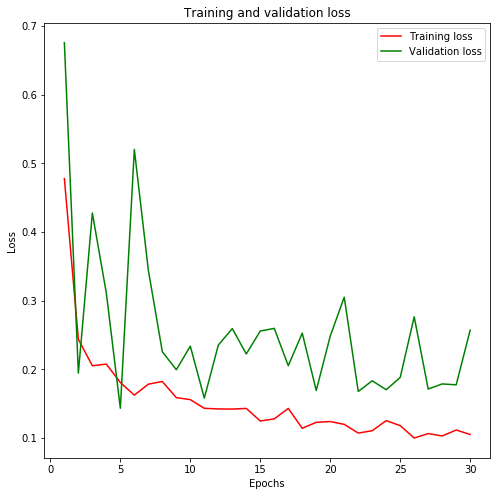

In [22]:
# Plotting training and validation loss; 
# import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(8, 8))
loss = cnn.history.history['loss']
val_loss = cnn.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig("loss.png", dpi=fig.dpi)

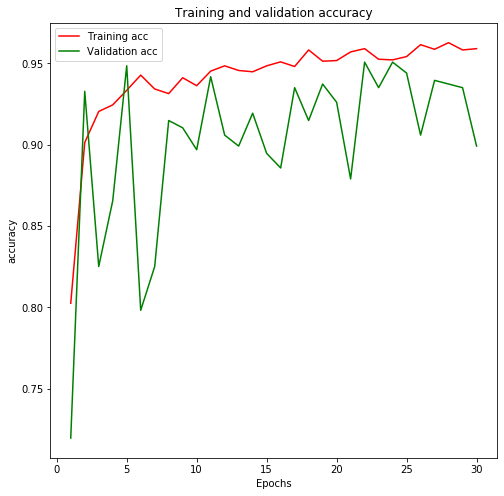

In [23]:
# Plotting training and validation accuracy
fig2 = plt.figure(figsize=(8, 8))
acc = cnn.history.history['acc']
val_acc = cnn.history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
fig.savefig("accuracy.png", dpi=fig.dpi)

In [25]:
# BACTERIA-8705009-0001
import numpy as np
from keras.preprocessing import image
# Loading the image from the directory
test_image = image.load_img('validation_set1/BacPne/BACTERIA-9913238-0003.jpeg', target_size = (224, 224))
# transfer the image to array
test_image = image.img_to_array(test_image)
# adding the dimension
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Pneumonia'
else:
  prediction = 'Normal'

In [26]:
print(prediction)

Pneumonia


In [29]:
# Need some corrections ..
test_image = image.load_img('validation_set1/BacPne/BACTERIA-9857270-0004.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Pneumonia'

In [30]:
print(prediction)

Normal


In [31]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
valid_set = valid_datagen.flow_from_directory('validation_set1',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 12 images belonging to 1 classes.


In [33]:
y_pred = cnn.predict(valid_set)

In [34]:
L1 = []

for value in y_pred:
    if value < 0.5:
        L1.append(1)
    else:
        L1.append(0)

        
print(L1)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:
valid_set2 = valid_datagen.flow_from_directory('validation_set2',
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 15 images belonging to 1 classes.


In [36]:
L2 = []

for value in cnn.predict(valid_set2):
    if value < 0.5:
        L2.append(1)
    else:
        L2.append(0)
        
print(L2)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


prediction : L

In [37]:
L = L1 + L2

In [39]:
print(L)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Original Value refer T

In [38]:
T = []
for int in L1:
    T.append(1)
for int in L2:
    T.append(0)

print(T)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(T, L)
print(cm)
accuracy_score(T, L)

[[14  1]
 [ 1 11]]


0.9259259259259259

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(T, L)


In [ ]:
# import pylab as pl

# pl.matshow(cm)
# pl.title('Confusion matrix')
# pl.xlabel('xlabel')
# pl.colorbar()
# pl.show()

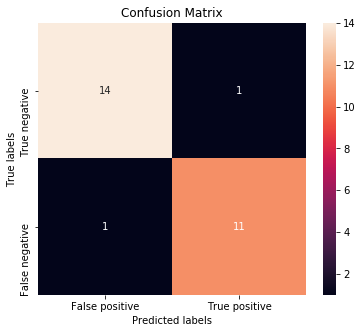

In [46]:
import seaborn as sns
# import matplotlib.pyplot as plt     
fig3 = plt.figure(figsize=(6, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False positive', 'True positive']); ax.yaxis.set_ticklabels(['True negative', 'False negative']);
fig3.savefig("cm.png")

In [47]:
print(len(L1))
print(len(L2))

12
15


In [ ]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

#y_true = T
#y_probas = L
#skplt.metrics.plot_roc_curve(y_true, y_probas)
#plt.show()

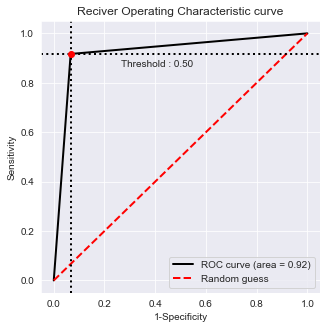

In [50]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(T, L, labels=["Class 1", "Class 2"])

# Figures
fig5 = plt.figure(figsize=(5, 5))
bc.plot_roc_curve()
plt.title('Reciver Operating Characteristic curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()
fig5.savefig("roc.png", dpi=fig.dpi)